이번 장은 머신러닝의 아주 기초적인 맛보기이다. 자산운용에 머신러징을 적용하는 것은 별도의 Repository에 저장할 예정이다.
머신러닝의 학습을 위해선 아래와 같은 학습이 필요하다

- 수학/통계(편미분, 벡터연산, 베이지안통계 등)
- 머신러닝의 이론(퍼셉트론, 오차역전파 등)
- 머신 러닝 알고리즘(서포트 벡터 머신(SVM), 합성곱신경망(CNN), 순환신경망(RNN), 머신러닝 라이브러리(Scikit-Learn, Tensorflow, Keras 등))


아래 코드는...
- 회귀(선형회귀는 생략, Quant-Lab에서 교수님과 회귀분석은 질리도록 해서 생략...)와 KNN 알고리즘이다.
- 또한 주가 지수 예측과 매매 전략과 같은 기본적인 코드이다.

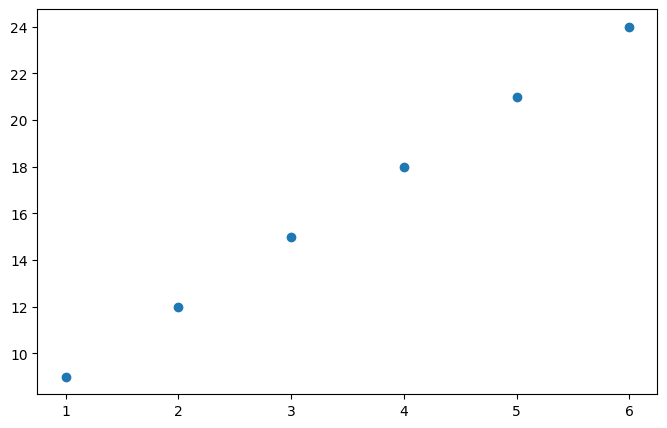

In [1]:
# 비용함수와 경사하강법

import numpy as np
import matplotlib.pyplot as plt

x_data = np.array([1., 2., 3., 4., 5., 6.])
y_data = np.array([9., 12., 15., 18., 21., 24.])
 
#그래프로 나타내 봅니다.
plt.figure(figsize=(8,5))
plt.scatter(x_data, y_data)
plt.show()

In [2]:
#리스트로 되어 있는 x와 y값을 넘파이 배열로 바꾸어 줍니다.(인덱스를 주어 하나씩 불러와 계산이 가능해 지도록 하기 위함입니다.)
# x_data = np.array(x)
# y_data = np.array(y)
 
# 기울기 W와 절편 b의 값을 초기화 합니다.
W = 0
b = 0
 
#학습률을 정합니다.
lr = 0.05 
 
#몇 번 반복될지를 설정합니다.(0부터 세므로 원하는 반복 횟수에 +1을 해 주어야 합니다.)
epochs = 1000 
 
#경사 하강법을 시작합니다.
for i in range(epochs): # epoch 수 만큼 반복
    y_hat = W * x_data + b  #y를 구하는 식을 세웁니다
    error = y_data - y_hat  #오차를 구하는 식입니다.
    W_diff = -(1/len(x_data)) * sum(x_data * (error)) # 오차함수를 a로 미분한 값입니다. 
    b_diff = -(1/len(x_data)) * sum(error)  # 오차함수를 b로 미분한 값입니다. 
    W = W - lr * W_diff  # 학습률을 곱해 기존의 a값을 업데이트합니다.
    b = b - lr * b_diff  # 학습률을 곱해 기존의 b값을 업데이트합니다.
    if i % 100 == 0:    # 100번 반복될 때마다 현재의 a값, b값을 출력합니다.
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, W, b))

epoch=0, 기울기=3.3250, 절편=0.8250
epoch=100, 기울기=3.4651, 절편=4.0088
epoch=200, 기울기=3.1860, 절편=5.2037
epoch=300, 기울기=3.0744, 절편=5.6816
epoch=400, 기울기=3.0297, 절편=5.8727
epoch=500, 기울기=3.0119, 절편=5.9491
epoch=600, 기울기=3.0048, 절편=5.9796
epoch=700, 기울기=3.0019, 절편=5.9919
epoch=800, 기울기=3.0008, 절편=5.9967
epoch=900, 기울기=3.0003, 절편=5.9987


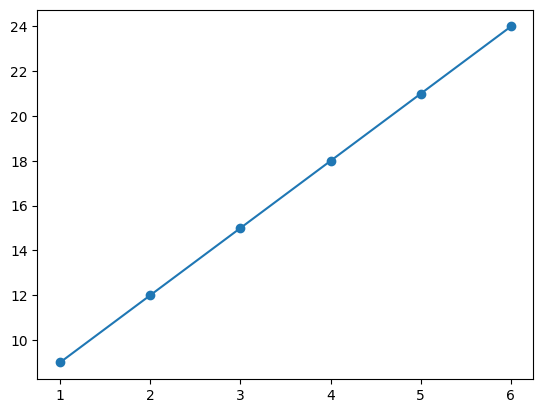

In [3]:

# 앞서 구한 기울기와 절편을 이용해 그래프를 그려 봅니다.
y_pred = W * x_data + b
plt.scatter(x_data, y_data)
plt.plot([min(x_data), max(x_data)], [min(y_pred), max(y_pred)])
plt.show()
     

In [4]:
# 유클리드 거리

# K최근접이웃 알고리즘
def euclidean_distance(pt1, pt2):
  distance = 0
  for i in range(len(pt1)):
    distance += (pt1[i] - pt2[i]) ** 2
  return distance ** 0.5

print(euclidean_distance([5, 4, 3], [1, 7, 9]))

7.810249675906654


In [5]:

import math

def euclidean_distance(pt1, pt2):
  return math.sqrt(sum([(d1-d2)**2 for d1, d2 in zip(pt1,pt2)]))

print(euclidean_distance([5, 4, 3], [1, 7, 9]))  

7.810249675906654


In [6]:
# 박쥐 분류 K-mean algorithm

# Test distance function
# [x, y, type]
zoo = [
  [ 2.78 , 2.55 , 0 ],
	[ 1.46 , 2.36 , 0 ],
	[ 3.39 , 4.40 , 0 ],
	[ 1.38 , 1.85 , 0 ],
	[ 3.06 , 3.00 , 0 ],
	[ 7.62 , 2.75 , 1 ],
	[ 5.33 , 2.08 , 1 ],
	[ 6.92 , 1.77 , 1 ],
	[ 8.67 ,-0.24 , 1 ],
	[ 7.67 , 3.50 , 1 ] 
]

In [7]:

bat = [3,4]

for animal in zoo:
	d = euclidean_distance(bat, animal)
	print(d)

1.4665946952038251
2.249711092562776
0.5586591089385372
2.6920066864701506
1.0017983829094554
4.786115335008132
3.0191555110659674
4.509911307331886
7.080007062143371
4.696690324047349


In [8]:
distances = []

bat = [3,4]

for animal in zoo:
	d = euclidean_distance( bat, animal )
	distances.append( ( animal, d ) )

distances.sort( key=lambda tup: tup[1] )

k = 3
for i in range(k):  
  print(distances[i])

([3.39, 4.4, 0], 0.5586591089385372)
([3.06, 3.0, 0], 1.0017983829094554)
([2.78, 2.55, 0], 1.4665946952038251)


In [9]:
# Locate the most similar neighbors
def get_neighbors(train, new_one, k):
	distances = []
	for t in train:
		d = euclidean_distance(new_one, t)	
		distances.append((t, d))
	distances.sort(key=lambda tup: tup[1])
	neighbors = []
	for i in range(k):
		neighbors.append(distances[i][0])
	return neighbors

k = 3
neighbors = get_neighbors(zoo, bat, k)
for neighbor in neighbors:
	print(neighbor)

[3.39, 4.4, 0]
[3.06, 3.0, 0]
[2.78, 2.55, 0]


In [12]:
# K-최근접 알고리즘을 이용한 회귀

import warnings
warnings.filterwarnings(action='ignore')
# warnings.filterwarnings(action='default')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# from pandas_datareader import data as web
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import FinanceDataReader as fdr

In [15]:
import FinanceDataReader as fdr

symbol = '005930'  # 삼성전자 주식 코드
start = '2016-01-01'
end = '2020-01-01'

df = fdr.DataReader(symbol, start, end)

# 필요한 열(칼럼)만 선택
df = df[['Open', 'High', 'Low', 'Close']]

# 데이터 출력
print(df.head(), df.tail())

             Open   High    Low  Close
Date                                  
2016-01-04  25200  25200  24100  24100
2016-01-05  24040  24360  23720  24160
2016-01-06  24160  24160  23360  23500
2016-01-07  23320  23660  23020  23260
2016-01-08  23260  23720  23260  23420              Open   High    Low  Close
Date                                  
2019-12-23  56100  56400  55100  55500
2019-12-24  55600  55700  54800  55000
2019-12-26  54700  55400  54400  55400
2019-12-27  55700  56900  55500  56500
2019-12-30  56200  56600  55700  55800


In [16]:
# 예측변수 설정
df = df.dropna()
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low
X = df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2016-01-04,1100,1100
2016-01-05,-120,640
2016-01-06,660,800
2016-01-07,60,640
2016-01-08,-160,460


In [17]:
# 목적변수 설정
Y = np.where( df['Close'].shift(-1) > df['Close'],1,-1)
Y

array([ 1, -1, -1,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1,  1, -1, -1,  1,
       -1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1, -1,
        1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1, -1,
        1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1,
       -1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1, -1,
       -1, -1, -1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1,
        1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1,  1, -1,
        1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,
       -1,  1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1, -1,
        1,  1, -1,  1, -1, -1, -1,  1,  1, -1, -1,  1,  1,  1, -1,  1, -1,
       -1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1,  1,  1,  1,  1, -1,
       -1, -1,  1,  1,  1, -1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,
       -1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,
        1, -1,  1,  1, -1

In [20]:
# 데이터셋 분할
train_pct = 0.7

split = int( train_pct*len(df) )

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

# X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [21]:
# KNN 모델 설정
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, Y_train)
accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))

print('Train data Accuracy: %.2f' % accuracy_train)
print('Test  data Accuracy: %.2f' % accuracy_test)

Train data Accuracy: 0.61
Test  data Accuracy: 0.49


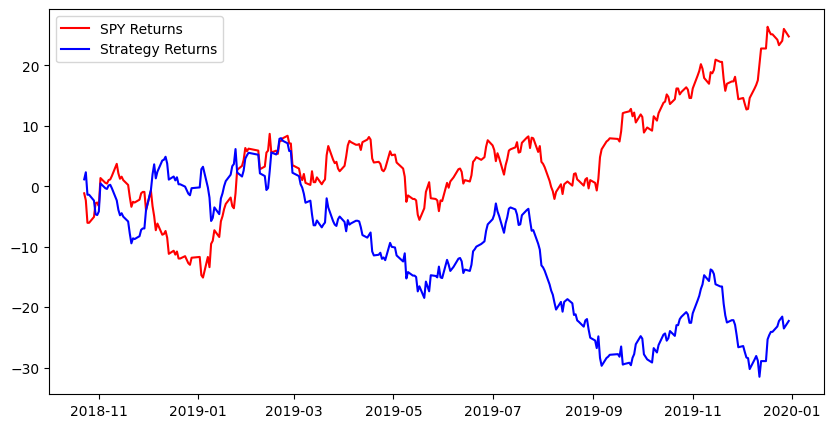

In [22]:
# 모델을 바탕으로 전략 실행


df['Signal'] = knn.predict(X)
df['SPY_Returns'] = np.log(df['Close']/df['Close'].shift(1))
Cum_SPY_Returns = df[split:]['SPY_Returns'].cumsum()*100

df['STR_Returns'] = df['SPY_Returns']*df['Signal'].shift(1)
Cum_STR_Returns = df[split:]['STR_Returns'].cumsum()*100

plt.figure(figsize=(10,5))
plt.plot(Cum_SPY_Returns, color='r', label='SPY Returns')
plt.plot(Cum_STR_Returns, color='b', label='Strategy Returns')
plt.legend()
plt.show()

In [23]:
# Sharp ratio
Std = Cum_STR_Returns.std()
Sharpe = (Cum_STR_Returns - Cum_SPY_Returns)/Std
Sharpe = Sharpe.mean()
print('Sharpe ratio: %.2f' % Sharpe)

Sharpe ratio: -1.51


In [24]:
# 로지스틱 회귀

import matplotlib.pyplot as plt
import numpy as np
import math


In [25]:

def sigmoid(x):
    v = []
    for item in x:
        v.append(1/(1+math.exp(-item)))
    return v
     

In [26]:
x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)

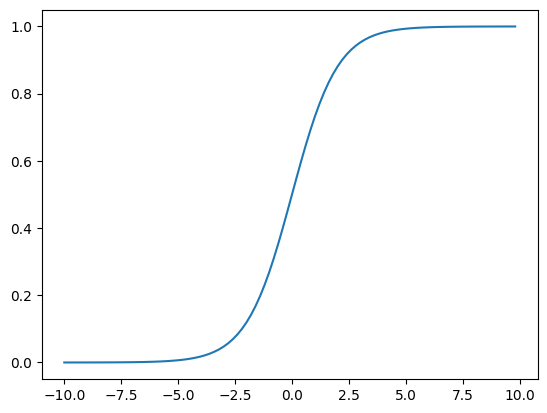

In [27]:

plt.plot(x,sig)
plt.show()

In [30]:

import numpy as np
import pandas as pd
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [31]:
symbol = '005930'  # 삼성전자 주식 코드
start = '2016-01-01'
end = '2020-01-01'

df = fdr.DataReader(symbol, start, end)

# 필요한 열(칼럼)만 선택
df = df[['Open', 'High', 'Low', 'Close']]

# 데이터 출력
print(df.head(), df.tail())

             Open   High    Low  Close
Date                                  
2016-01-04  25200  25200  24100  24100
2016-01-05  24040  24360  23720  24160
2016-01-06  24160  24160  23360  23500
2016-01-07  23320  23660  23020  23260
2016-01-08  23260  23720  23260  23420              Open   High    Low  Close
Date                                  
2019-12-23  56100  56400  55100  55500
2019-12-24  55600  55700  54800  55000
2019-12-26  54700  55400  54400  55400
2019-12-27  55700  56900  55500  56500
2019-12-30  56200  56600  55700  55800


In [32]:
# 예측변수/독립변수 설정
df['MA10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['MA10'])

df['OpenClose'] = df['Open'] - df['Close'].shift(1)
df['OpenOpen'] = df['Open'] - df['Open'].shift(1)
df = df.dropna()
X = df[['Open', 'High', 'Low', 'Close', 'MA10', 'Corr', 'OpenClose', 'OpenOpen']]

In [33]:
# 목표변수/종속변수 설정
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)

In [34]:
# 데이터셋 분할

train_pct = 0.7
split = int(train_pct * len(df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [35]:
# 로지스틱 회귀모델 설정 및 훈련

model = LogisticRegression()
model = model.fit(X_train, y_train)
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Open,[-0.000503429838318497]
1,High,[0.0005195094442238646]
2,Low,[0.00027692046367407694]
3,Close,[-0.0004736303635727451]
4,MA10,[0.00018084780927178068]
5,Corr,[3.8751879484042885e-06]
6,OpenClose,[0.00029913969542743924]
7,OpenOpen,[6.211780841159537e-05]


In [36]:
# 클래스 확률 예측

len(X_test)

289

In [37]:
probability = model.predict_proba(X_test)
print(probability)
predicted = model.predict(X_test)
print(predicted)

[[0.366148   0.633852  ]
 [0.41641346 0.58358654]
 [0.42697242 0.57302758]
 [0.44416682 0.55583318]
 [0.63334631 0.36665369]
 [0.60711408 0.39288592]
 [0.50070727 0.49929273]
 [0.4392796  0.5607204 ]
 [0.49795293 0.50204707]
 [0.53953325 0.46046675]
 [0.62241513 0.37758487]
 [0.51196252 0.48803748]
 [0.52387328 0.47612672]
 [0.45308743 0.54691257]
 [0.46478572 0.53521428]
 [0.53255275 0.46744725]
 [0.45856499 0.54143501]
 [0.39413414 0.60586586]
 [0.45400005 0.54599995]
 [0.44232824 0.55767176]
 [0.47223836 0.52776164]
 [0.49979652 0.50020348]
 [0.45334716 0.54665284]
 [0.3739973  0.6260027 ]
 [0.44365787 0.55634213]
 [0.50593535 0.49406465]
 [0.50202246 0.49797754]
 [0.42094354 0.57905646]
 [0.35289617 0.64710383]
 [0.44920893 0.55079107]
 [0.3912907  0.6087093 ]
 [0.42312098 0.57687902]
 [0.41201961 0.58798039]
 [0.41860433 0.58139567]
 [0.40215426 0.59784574]
 [0.44087338 0.55912662]
 [0.41536058 0.58463942]
 [0.44021767 0.55978233]
 [0.48394218 0.51605782]
 [0.44688284 0.55311716]


In [38]:
# 모델 평가
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[57 82]
 [66 84]]
              precision    recall  f1-score   support

          -1       0.46      0.41      0.44       139
           1       0.51      0.56      0.53       150

    accuracy                           0.49       289
   macro avg       0.48      0.49      0.48       289
weighted avg       0.49      0.49      0.49       289



In [39]:
print(model.score(X_test,y_test))

0.48788927335640137


In [40]:
cross_val = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(cross_val)
print(cross_val.mean())


[0.54639175 0.60416667 0.55208333 0.46875    0.47916667 0.55208333
 0.59375    0.47916667 0.48958333 0.5       ]
0.5265141752577319


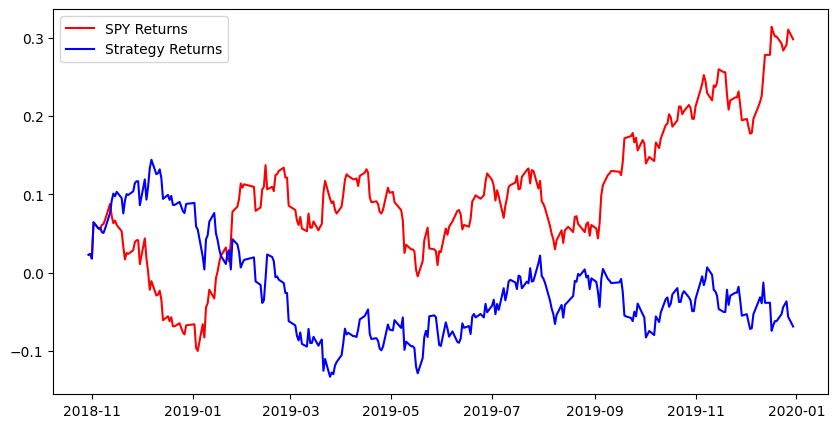

In [41]:
# 매매 전략

df['Signal'] = model.predict(X)
df['SPY_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_SPY_returns = np.cumsum(df[split:]['SPY_returns'])

df['STR_returns'] = df['SPY_returns']* df['Signal'].shift(1)
Cumulative_STR_returns = np.cumsum(df[split:]['STR_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_SPY_returns, color='r',label = 'SPY Returns')
plt.plot(Cumulative_STR_returns, color='b', label = 'Strategy Returns')
plt.legend()
plt.show()